# Assignment 1 : Filters & Edge Detection
Xiao-Bao Bao
April 10, 2022

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Input img shape:  (600, 800, 3)
Num pixels:  1440000


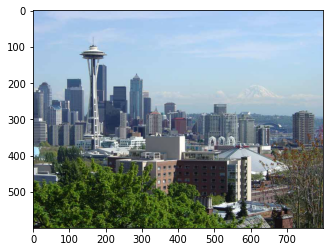

In [2]:
import os
import numpy as np
import scipy as sc
import cv2
from scipy import ndimage
from skimage import filters
from matplotlib import pyplot as plt
# import seaborn as sns
from PIL import Image
# sns.set(context='poster')
from loguru import logger
%matplotlib inline

seattleImg = Image.open(os.getcwd() + '/hw1_data/Seattle.jpg')
print(type(seattleImg))
seattleImg = np.asarray(seattleImg)
print("Input img shape: ", seattleImg.shape)
print("Num pixels: ", seattleImg.size)
plt.imshow(seattleImg)

In [3]:
def convolve1D(image, filter):
    image = np.asarray(image)
    print("Filter type: ", type(filter))
    filter_length = filter.shape[0]
    source_pix = 0
    print(source_pix)
    sum = 0

    # print(source_pix)
    print("Image shape: ", image.shape)

    for source_pix in range(source_pix, image.shape[0] - int(filter_length/2)*2):
        print("Source index: ", source_pix)
        for j in range(filter_length): 
            sum += filter[j] * image[source_pix + j]
            print(filter[j] , " ", image[source_pix + j], " ", sum)
        # print(sum / filter_length)
        center = source_pix + int(filter_length/2)
        print(center)
        image[center] = int(sum/filter_length)
        sum = 0

    # TODO Need to handle padding

    return image    

box_filter = np.ones((3,), dtype=float)
side_filter = [1, 0, -1]
side_filter = np.array(side_filter, dtype=float)
print(type(side_filter))
print(side_filter.shape)
test_image = [1, 2, 3, 4, 5, 6, 7, 8, 9]

print(convolve1D(test_image, side_filter))



<class 'numpy.ndarray'>
(3,)
Filter type:  <class 'numpy.ndarray'>
0
Image shape:  (9,)
Source index:  0
1.0   1   1.0
0.0   2   1.0
-1.0   3   -2.0
1
Source index:  1
1.0   0   0.0
0.0   3   0.0
-1.0   4   -4.0
2
Source index:  2
1.0   -1   -1.0
0.0   4   -1.0
-1.0   5   -6.0
3
Source index:  3
1.0   -2   -2.0
0.0   5   -2.0
-1.0   6   -8.0
4
Source index:  4
1.0   -2   -2.0
0.0   6   -2.0
-1.0   7   -9.0
5
Source index:  5
1.0   -3   -3.0
0.0   7   -3.0
-1.0   8   -11.0
6
Source index:  6
1.0   -3   -3.0
0.0   8   -3.0
-1.0   9   -12.0
7
[ 1  0 -1 -2 -2 -3 -3 -4  9]


<class 'PIL.PngImagePlugin.PngImageFile'>
Input img shape:  (512, 512, 3)


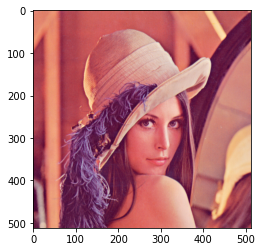

In [146]:
# Open the test image with PIL image
lenna_image = Image.open(os.getcwd() + '/Lenna_(test_image).png')
print(type(lenna_image))
lenna_image = np.asarray(lenna_image)
print("Input img shape: ", lenna_image.shape)
plt.imshow(lenna_image)


In [24]:
# # Open the test image with OpenCV 
# lenna_cv = cv2.imread('Lenna_(test_image).png')
# # lenna_cv = cv.cvtColor(lenna_cv, cv.COLOR_BGR2RGB) only used for converting PIL (BGR) -> CV2 (RGB)
# cv2.imshow('lenna', lenna_cv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

115

In [2]:
# Converts the image to gray scale
# def preprocessImage(image):
#     cv_image = cv2.imread(image)
#     return cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)

In [5]:

def load_image(image_path):
    """
    Load the image using opencv
    :param image_path: <String> Path of input_image
    """
    coloured_image = cv2.imread(image_path)
    grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    print('image matrix size: ', grey_image.shape)
    print('\n First 5 columns and rows of the image matrix: \n', grey_image[:5, :5])
    cv2.imwrite('TopLeft5x5.jpg', grey_image[:5, :5])
    return grey_image

input_image = load_image(os.getcwd() + '/Lenna_(test_image).png')

image matrix size:  (512, 512)

 First 5 columns and rows of the image matrix: 
 [[162 162 162 161 162]
 [162 162 162 161 162]
 [162 162 162 161 162]
 [162 162 162 161 162]
 [162 162 162 161 162]]


kernel:  (3, 3)
	 img w/ padding:  (514, 514)
test  (3, 3)


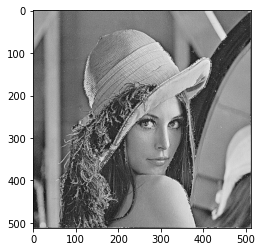

In [33]:
# Takes 2d image and kernal numpy array objects using element-wise multiplication
# Performance: O(n^2)
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]

    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    print("kernel: ", kernel.shape)
    print("\t img w/ padding: ", image_padded.shape)
    
    test = []
    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            
            output[y, x]=(kernel * image_padded[y: y+kernel_height, x: x+kernel_width]).sum()
            test = image_padded[y: y+kernel_height, x: x+kernel_width].shape
    
    print("test ", test)
    return output

# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, kernel=KERNEL)
cv2.imwrite('sharpened_image.jpg', image_sharpen)
plt.imshow(cv2.cvtColor(image_sharpen, cv2.COLOR_GRAY2RGB))

In [147]:
lena_img_red = lenna_image[:, :, 0]
print("Original img: \n")
print(lena_img_red)

Original img: 

[[226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 ...
 [ 84  84  92 ... 173 172 177]
 [ 82  82  96 ... 179 181 185]
 [ 82  82  96 ... 179 181 185]]


In [182]:
# Takes a 2D image matrix and returns a summed table by recursively adding
def getTableSum(image):
    
    # copy the image over to a new array
    image2d = np.copy(image)
    image2d = np.array(image2d, dtype=np.float64)
    print(image2d)
    # print(image2d.shape)
    img_width = image2d.shape[1]
    img_height = image2d.shape[0]

    # output = np.zeros_like(image2d, dtype=np.int64)

    # Compute sum of elements row-wise
    # i represents the current y-val, j represents to x-val
    for i in range(img_height):
        # print(i)
        for j in range(1, img_width):
            # print("\t", image2d[i, j])
            # print("current ", image2d[i, j], "\t left val: ", image2d[i, j - 1])
            image2d[i, j] = float(image2d[i, j]) + float(image2d[i, j - 1])
            # print("\n new val sum: ", image2d[i, j])

    print("After row-wise addition: \n", image2d)
    print(image2d.shape)

    # Compute sum of elements col-wise
    # Let i represent the current y-val, j represent the current x-val
    for i in range(img_height):
        for j in range(1, img_width):
            image2d[j, i] = float(image2d[j, i]) + float(image2d[j - 1, i])
    
    print("After col-wise addition: \n", image2d)
    print(image2d.shape)
    # return output
    return image2d

sumTable = getTableSum(lena_img_red)
print("Summed area image: \n")
print(sumTable[:5, :5])

[[226. 226. 223. ... 230. 221. 200.]
 [226. 226. 223. ... 230. 221. 200.]
 [226. 226. 223. ... 230. 221. 200.]
 ...
 [ 84.  84.  92. ... 173. 172. 177.]
 [ 82.  82.  96. ... 179. 181. 185.]
 [ 82.  82.  96. ... 179. 181. 185.]]
After row-wise addition: 
 [[2.26000e+02 4.52000e+02 6.75000e+02 ... 1.04541e+05 1.04762e+05
  1.04962e+05]
 [2.26000e+02 4.52000e+02 6.75000e+02 ... 1.04541e+05 1.04762e+05
  1.04962e+05]
 [2.26000e+02 4.52000e+02 6.75000e+02 ... 1.04541e+05 1.04762e+05
  1.04962e+05]
 ...
 [8.40000e+01 1.68000e+02 2.60000e+02 ... 8.87090e+04 8.88810e+04
  8.90580e+04]
 [8.20000e+01 1.64000e+02 2.60000e+02 ... 8.87730e+04 8.89540e+04
  8.91390e+04]
 [8.20000e+01 1.64000e+02 2.60000e+02 ... 8.87730e+04 8.89540e+04
  8.91390e+04]]
(512, 512)
After col-wise addition: 
 [[2.2600000e+02 4.5200000e+02 6.7500000e+02 ... 1.0454100e+05
  1.0476200e+05 1.0496200e+05]
 [4.5200000e+02 9.0400000e+02 1.3500000e+03 ... 2.0908200e+05
  2.0952400e+05 2.0992400e+05]
 [6.7800000e+02 1.3560000e+03

In [149]:
print(np.array([3,2]))

[3 2]


In [183]:
# The general idea is that you apply the filter weights first
# So pre-multiply the sliced cells you're convolving with the kernel
# weights. Then, build the integral sum table of the image after the kernel
# filter has assed by the image. 
# Finally, compute the sum of the sliced cells within the kernel size
# window and output that sum to the output matrix

# Add zero padding to the image prior to any convolving
# Make sure you only convolve a window and avoid multiplying zeroes by the weights

mat1 = np.array([[1, 1, 1], [1, 10, 1], [1, 1, 1]])
mat2 = np.array([[0.1, 0.1, 0.1],[0.1, 0.2, 0.1], [0.1, 0.1, 0.1]])



mat3 = mat1 * mat2

mat3 = getTableSum(mat3)


print(mat3)


[[0.1 0.1 0.1]
 [0.1 2.  0.1]
 [0.1 0.1 0.1]]
After row-wise addition: 
 [[0.1 0.2 0.3]
 [0.1 2.1 2.2]
 [0.1 0.2 0.3]]
(3, 3)
After col-wise addition: 
 [[0.1 0.2 0.3]
 [0.2 2.3 2.5]
 [0.3 2.5 2.8]]
(3, 3)
[[0.1 0.2 0.3]
 [0.2 2.3 2.5]
 [0.3 2.5 2.8]]


In [184]:
# Computes the sum based on the kernel size and the bottom rightmost point
def computeSum(sumTable, kernelShape=(2,2), coordinate=(2,2)):
    """Takes an integral sum table, """
    # Get the bottom right coords
    x2 = coordinate[0]
    y2 = coordinate[1]
    # Get the top left coords
    x1 = x2 - kernelShape[1]
    y1 = y2 - kernelShape[0]

    print(sumTable[y1, x1], "\n")
    print(sumTable[y2, x2], "\n")

    print(sumTable[y2, x1])
    print(sumTable[y1, x2])
    print(sumTable[y2, x2])
    print(sumTable[y1, x1])

    sum = sumTable[y2, x2] - sumTable[y2, x1] - sumTable[y1, x2] + sumTable[y1, x1]
    return sum
    
print(computeSum(mat3))

0.1 

2.8 

0.30000000000000004
0.30000000000000004
2.8
0.1
2.3000000000000003


In [74]:
def zeroPadding(image):
    num_channels = 0
    if len(image.shape) > 2:
        num_channels = image.shape[2]

    output = np.zeros((image.shape[0] + 2, image.shape[1] + 2, num_channels))
    for c in range(num_channels):
        img_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
        img_padded[1: -1, 1: -1] = image[:, :, c]
        output[:, :, c] = img_padded[:, :]
    return output

image_padded = zeroPadding(lenna_image)
print(image_padded.shape)
for c in range(3):
    print("Image with zero padding \n", image_padded[:5, :5, c])

(514, 514, 3)
Image with zero padding 
 [[  0.   0.   0.   0.   0.]
 [  0. 226. 226. 223. 223.]
 [  0. 226. 226. 223. 223.]
 [  0. 226. 226. 223. 223.]
 [  0. 226. 226. 223. 223.]]
Image with zero padding 
 [[  0.   0.   0.   0.   0.]
 [  0. 137. 137. 137. 136.]
 [  0. 137. 137. 137. 136.]
 [  0. 137. 137. 137. 136.]
 [  0. 137. 137. 137. 136.]]
Image with zero padding 
 [[  0.   0.   0.   0.   0.]
 [  0. 125. 125. 133. 128.]
 [  0. 125. 125. 133. 128.]
 [  0. 125. 125. 133. 128.]
 [  0. 125. 125. 133. 128.]]


[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 226. 226. 223. 223. 226. 226. 228.]
 [  0. 226. 226. 223. 223. 226. 226. 228.]
 [  0. 226. 226. 223. 223. 226. 226. 228.]
 [  0. 226. 226. 223. 223. 226. 226. 228.]
 [  0. 226. 226. 223. 223. 226. 226. 228.]
 [  0. 227. 227. 227. 222. 226. 228. 226.]
 [  0. 228. 228. 225. 224. 225. 229. 229.]]


In [ ]:
# Takes an image of n-channels and returns a new matrix with the summed values
def integralImage(image):
    """
    This function which takes an image and recursively adds the top and left grid
    values to each node.

    :param image: a numpy array of size [image_height, image_width]
    :return: a numpy array of size [image_height, image_width] (summed values).
    """
    # Stuff for images with n > 0 channels
    num_channels = 0
    if len(image.shape) > 2:
        num_channels = image.shape[2]

    output = np.zeros_like(image)
    # Call helper function for each channel
    for c in range(num_channels):
        output[:, :, c] = getTableSum(image[:, :, c])
    return output

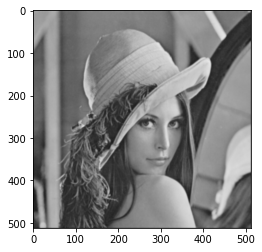

In [14]:
# kernel to be used for box blur
imageboxblur = convolve2d(input_image,
                         kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0)
cv2.imwrite('box_blur.jpg', imageboxblur)
plt.imshow(cv2.cvtColor(imageboxblur, cv2.COLOR_GRAY2RGB))


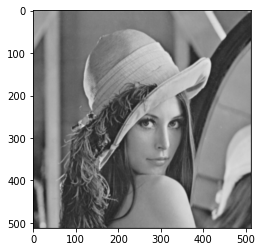

In [13]:
# kernel to be used for gaussian blur
imagegaussianblur = convolve2d(input_image,
                         kernel=np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16.0)
cv2.imwrite('gaussian_blur.jpg', imagegaussianblur)
plt.imshow(cv2.cvtColor(imagegaussianblur, cv2.COLOR_GRAY2RGB))

## 1. 

In [34]:
def GaussianBlurImage(image, sigma)->Image:
    filter_size = 2 * int(sigma * 4 + 0.5) + 1
    print(f'filter size: {filter_size}')
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)

    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_size // 2
            y = j - filter_size // 2
            # print(x, y)
            gaussian_filter[i, j] = 1.0 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2)/(2 * sigma ** 2))
    
    print("Gaussian Filter shape: ", gaussian_filter.shape)
    # plt.imshow(gaussian_filter)

    # ADD IMAGE PADDING
    # im_padded = np.pad(image, pad_width=((filter_size // 2, filter_size // 2), (filter_size // 2, filter_size // 2), (0, 0)), mode='constant', constant_values=0).astype(np.float32)
    # fig, (ax, ax_padded) = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
    # ax.imshow(image)
    # ax_padded.imshow(im_padded.astype(np.uint8))
    # plt.show()

    # PERFORM CONVOLUTION
    image_filtered = np.zeros_like(image, dtype=np.int8)
    for c in range(3): # 3 is chosen since the image is [x pix, y pix, n channels] where n = 3
        # image_filtered[:, :, c] = sc.ndimage.convolve(image[:, :, c], gaussian_filter, mode='constant', cval=0.0)
        # print(image_filtered[:, :, c])
        image_filtered[:, :, c] = convolve2d(image[:, :, c], kernel=gaussian_filter)

    # image_filtered = np.clip(image_filtered, 0, 255).astype(np.int8)
    return image_filtered



In [35]:
filtered_img = np.asarray(GaussianBlurImage(seattleImg, 4.0))
print(filtered_img.shape, type(filtered_img))
plt.imshow(filtered_img)

filter size: 33
Gaussian Filter shape:  (33, 33)
kernel:  (33, 33)
	 img w/ padding:  (602, 802)


ValueError: operands could not be broadcast together with shapes (33,33) (32,33) 